In [53]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [11]:
data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='cp1252')


In [30]:
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [19]:
data['']

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [27]:
data['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [28]:
data['Unnamed: 3'].value_counts()

Unnamed: 3
 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: count, dtype: int64

In [29]:
data['Unnamed: 2'].value_counts()

Unnamed: 2
 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                          

## Except column 1 and 2 rest contains the personal message of recieved by the user.


In [32]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [33]:
data2=data.copy()

In [34]:
data2.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [43]:
duplicate_id=data2.index[data2['v2'].duplicated()]


In [44]:
len(duplicate_id)

403

In [45]:
data3=data2.copy()

In [46]:
data3.drop(duplicate_id,axis=0,inplace=True)

In [49]:
data3.shape

(5169, 2)

In [48]:
data3.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [56]:
data3.rename(columns={'v1':'target','v2':'input'},inplace=True)

In [54]:
le=LabelEncoder()


In [61]:
data3['target']=le.fit_transform(data3['target'])

<Axes: ylabel='count'>

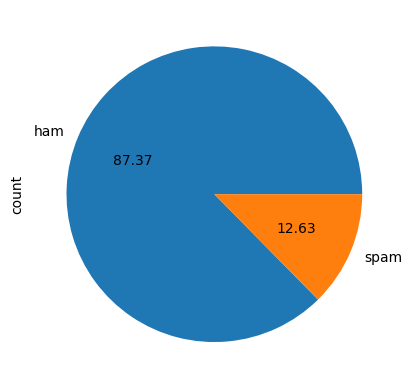

In [67]:
data3['target'].value_counts().plot(kind='pie',autopct='%.2f',labels=['ham','spam'])

In [68]:
import nltk

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## For classifying ham and spam it is important to know the structure of the message.


In [73]:
data3['char']=data3['input'].apply(lambda x: len(x))

In [78]:
data3['words']=data3['input'].apply(lambda x:len(nltk.word_tokenize(x)))

In [80]:
data3['sentence']=data3['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [84]:
data3=pd.DataFrame(data3,columns=data3.columns)

In [89]:
# ham structure.
data3[data3['target']==0][['char','words','sentence']].describe()


,char,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [90]:
#spam structure
data3[data3['target']==1][['char','words','sentence']].describe()


,char,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [102]:
data4=data3[['char','words','sentence','target']]

In [103]:
data4.corr()

,char,words,sentence,target
char,1.000000,0.965307,0.626118,0.384717
words,0.965307,1.000000,0.683561,0.264198
sentence,0.626118,0.683561,1.000000,0.267602
target,0.384717,0.264198,0.267602,1.000000


<Axes: >

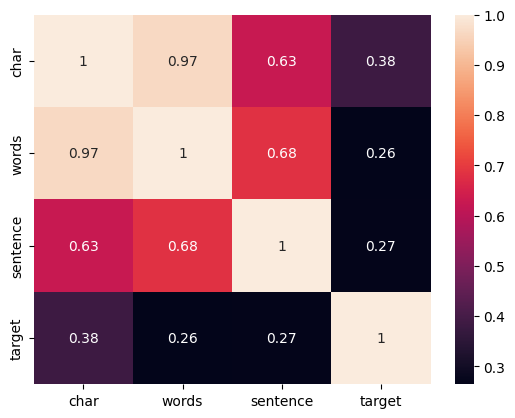

In [107]:
sns.heatmap(data4.corr(),annot=True)

## Data preprocessing

In [112]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [115]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [131]:
from nltk.stem import PorterStemmer
pt=PorterStemmer()

In [137]:
def process(text):
    text=text.lower()
    #tokenize
    text=nltk.word_tokenize(text)
   
    #remove special character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #remove stopwords and  punctuation
    text=y[:]
    y.clear()
    for i in text:
        if i not in stop and i not in string.punctuation:
            y.append(i) 
            
    #stemming
    text=y[:]
    y.clear()
    for i in text:
        y.append(pt.stem(i))
    return " ".join(y)

In [138]:
process ("Shreyan u secured 94% in the Exam")

'shreyan u secur 94 exam'

In [140]:
data3['transformed']=data3['input'].apply(process)

## Finding the most occuring word in spam and ham.

In [141]:
from wordcloud import WordCloud

In [159]:
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')

In [160]:
spam_word=wc.generate(data3[data3['target']==1]['transformed'].str.cat(sep=" "))

In [161]:
spam_word

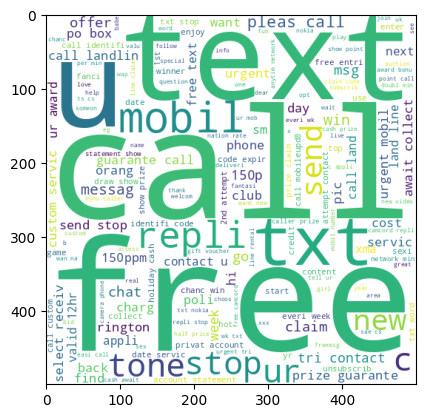

In [162]:
plt.pyplot.imshow(spam_word)

In [163]:
ham_word=wc.generate(data3[data3['target']==0]['transformed'].str.cat(sep=" "))

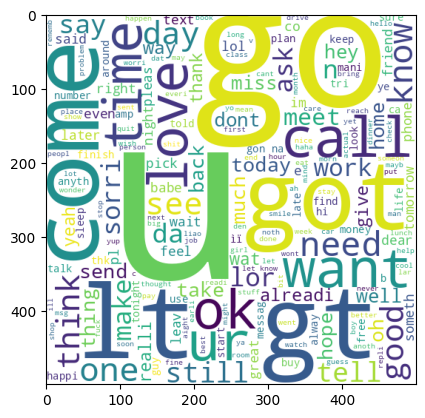

In [164]:
plt.pyplot.imshow(ham_word)

In [166]:
tf=data3[data3['target']==1]['transformed']

In [168]:
coll=[]
for i in tf.to_list():
    for word in i.split():
        coll.append(word)

In [171]:
from collections import Counter

In [173]:
Counter(coll).most_common(50)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 40),
 ('per', 39),
 ('chat', 38),
 ('tri', 37),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('msg', 34),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [174]:
f=data3[data3['target']==0]['transformed']
ll=[]
for i in f.to_list():
    for word in i.split():
        ll.append(word)

In [175]:
Counter(ll).most_common(50)

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164),
 ('4', 155),
 ('lor', 153),
 ('think', 149),
 ('home', 149),
 ('see', 145),
 ('still', 142),
 ('take', 141),
 ('da', 133),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 126),
 ('hope', 122),
 ('ask', 121),
 ('n', 120),
 ('sorri', 120),
 ('send', 120),
 ('r', 120),
 ('dont', 118),
 ('work', 117),
 ('today', 116),
 ('meet', 112),
 ('hi', 110),
 ('thing', 108),
 ('well', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106),
 ('wat', 103),
 ('miss', 102)]

In [208]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [178]:
cv=CountVectorizer()

In [182]:
X=cv.fit_transform(data3["transformed"]).toarray()

In [183]:
y=data3['target']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [189]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [188]:
gnb=GaussianNB()
mb=MultinomialNB()
bnb=BernoulliNB()

In [191]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [197]:
accuracy=accuracy_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
prec=precision_score(y_test,y_pred)

In [198]:
accuracy,con,prec

(0.874274661508704,
 array([[786, 110],
        [ 20, 118]]),
 0.5175438596491229)

In [199]:
mb.fit(X_train,y_train)
y_pred1=mb.predict(X_test)

In [200]:
accuracy=accuracy_score(y_test,y_pred1)
con=confusion_matrix(y_test,y_pred1)
prec=precision_score(y_test,y_pred1)

In [201]:
accuracy,con,prec

(0.965183752417795,
 array([[872,  24],
        [ 12, 126]]),
 0.84)

In [202]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)

In [203]:
accuracy=accuracy_score(y_test,y_pred2)
con=confusion_matrix(y_test,y_pred2)
prec=precision_score(y_test,y_pred2)

In [204]:
accuracy,con,prec

(0.9709864603481625,
 array([[893,   3],
        [ 27, 111]]),
 0.9736842105263158)

## Bernaulli is performing good.

In [209]:
tf=TfidfVectorizer()

In [210]:
X=tf.fit_transform(data3["transformed"]).toarray()

In [211]:
y=data3['target']

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [213]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [214]:
gnb=GaussianNB()
mb=MultinomialNB()
bnb=BernoulliNB()

In [215]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
prec=precision_score(y_test,y_pred)
accuracy,con,prec

(0.8704061895551257,
 array([[787, 109],
        [ 25, 113]]),
 0.509009009009009)

In [216]:
mb.fit(X_train,y_train)
y_pred1=mb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred1)
con=confusion_matrix(y_test,y_pred1)
prec=precision_score(y_test,y_pred1)
accuracy,con,prec

(0.9593810444874274,
 array([[896,   0],
        [ 42,  96]]),
 1.0)

In [217]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred2)
con=confusion_matrix(y_test,y_pred2)
prec=precision_score(y_test,y_pred2)
accuracy,con,prec

(0.9709864603481625,
 array([[893,   3],
        [ 27, 111]]),
 0.9736842105263158)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [222]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
sv=SVC(kernel='sigmoid',gamma=1.0)
kn=KNeighborsClassifier()
mb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gtc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xg= XGBClassifier(n_estimators=50,random_state=2)

In [231]:
clfs={
    'Lr':lr,
     'SVM':sv,
     'KN':kn,
     'NB':mb,
     'DTC':dtc,
     'AB':abc,
     'RFC':rfc,
     'BC':bc,
    'ETC':etc,
     'GBC':gtc,
     'XG':xg,
}

In [232]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [235]:
accuracy=[]
precision=[]
for name,clf in clfs.items():
    curr_accuracy,curr_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('For',name)
    print("accuracy",curr_accuracy)
    print('Precision',curr_precision)
    accuracy.append(curr_accuracy)
    precision.append(curr_precision)

For Lr
accuracy 0.9526112185686654
Precision 0.9320388349514563
For SVM
accuracy 0.9729206963249516
Precision 0.9661016949152542
For KN
accuracy 0.9003868471953579
Precision 1.0
For NB
accuracy 0.9593810444874274
Precision 1.0
For DTC
accuracy 0.9342359767891683
Precision 0.8301886792452831
For AB
accuracy 0.9613152804642167
Precision 0.9298245614035088
For RFC
accuracy 0.97678916827853
Precision 0.9913793103448276
For BC
accuracy 0.960348162475822
Precision 0.875968992248062
For ETC
accuracy 0.9758220502901354
Precision 0.9747899159663865
For GBC
accuracy 0.9516441005802708
Precision 0.8928571428571429
For XG
accuracy 0.9709864603481625
Precision 0.9354838709677419


In [237]:
df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy,'precision':precision}).sort_values('precision',ascending=False)

In [238]:
df

,Algorithm,Accuracy,precision
2,KN,0.900387,1.000000
3,NB,0.959381,1.000000
6,RFC,0.976789,0.991379
8,ETC,0.975822,0.974790
1,SVM,0.972921,0.966102
10,XG,0.970986,0.935484
0,Lr,0.952611,0.932039
5,AB,0.961315,0.929825
9,GBC,0.951644,0.892857
7,BC,0.960348,0.875969


In [239]:
import pickle

In [241]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))